**Notebook for Milestone 4**

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ML imports


In [3]:
#Load data
users = pd.read_csv('./../data/full_calcularis_users.csv')
events = pd.read_csv('./../data/full_calcularis_events.csv')
subtasks = pd.read_csv('./../data/full_calcularis_subtasks.csv')

print('Users: {}, Events: {}, Subtasks: {}'.format(len(users), len(events), len(subtasks)))

Users: 64932, Events: 2185200, Subtasks: 3502884


**Clean up data**. This includes:
    - *Add Items*

In [5]:
print(users.columns)
print(events.columns)
print(subtasks.columns)

Index(['user_id', 'learning_time_ms', 'logged_in_time_ms', 'language',
       'country', 'start', 'end'],
      dtype='object')
Index(['event_id', 'user_id', 'mode', 'game_name', 'learning_time_ms',
       'subtasks', 'number_range', 'start', 'end', 'skill_id', 'type'],
      dtype='object')
Index(['subtask_id', 'event_id', 'user_id', 'aim', 'answer', 'answerMode',
       'availableNumbers', 'correct', 'correctAnswerObject', 'correctNumber',
       'destination', 'distance', 'hasProperResult', 'interval', 'lowerBound',
       'maxHeight', 'minHeight', 'mode', 'multiplier', 'number',
       'numberRepresentations', 'numberToMultiply', 'numbers', 'operandA',
       'operandB', 'operator', 'range', 'representation', 'representations',
       'result', 'solution', 'solutionRepresentation', 'solveMode', 'source',
       'speed', 'startPosition', 'subtask_finished_timestamp', 'target',
       'timeoutInSeconds', 'timeoutInSteps', 'type', 'upperBound', 'step',
       'orderIndependent', 'divi

In [35]:
#types involve "['task' 'TRAINING_SELECTOR' 'ZOO' 'OVERVIEW' 'HELP' 'SHOP', 'ATTENTION_BOOSTER' 'GAME_START_PAUSE']"
#we are only interesting in "task" type for the wheel-spinning.
tasks = events[events.type == "task"]
print(len(tasks))
print(tasks.head(1))
print(tasks.game_name.nunique())
print(tasks.game_name.unique())

2153208
   event_id  user_id    mode   game_name  learning_time_ms  \
0         1        2  NORMAL  Subitizing           13094.0   

                                            subtasks number_range  \
0  [{'hasProperResult': True, 'range': 'R10', 'co...          R10   

                      start                       end  skill_id  type  
0  2020-08-20T07:13:50.876Z  2020-08-20T07:14:30.108Z       1.0  task  
29
['Subitizing' 'Conversion' 'Landing' 'Calculator' 'Comparison' 'Order'
 'Distance' 'Jump backwards' 'Calculator: Division' 'Secret Number'
 'Plus-minus' 'Series' 'Estimation on Number Line' 'Estimation'
 'Calculator: Multiplication' 'Shelf: random height'
 'Write as multiplication' 'Scale: Decomposition' 'Completion' 'Sliderule'
 'Scale: Subtraction' 'Scale: Subtraction by Tens and Ones' 'Difference'
 'Scale: Composition' 'Shelf: Jump Ahead' 'Scale: Conversion'
 'Calculator: Multiplication with ?' 'Shelf: given height' 'Distribution']


Calcularis has 29 different games. The question is, if each game is a different "skill" or if some are the same skill? We would need to categorize the games into the respective skills, but the problem is that we can only see 10 games in the demo version.

2034897


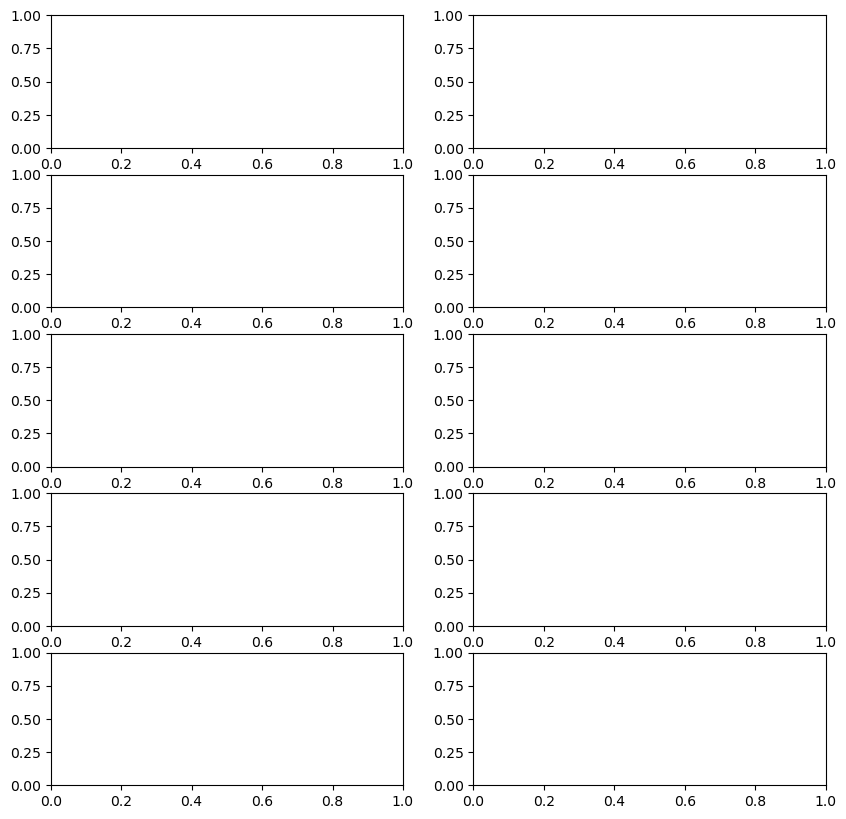

In [54]:
#Test how many tasks students solved in general of which type (to find proper threshold

#find out which games get played the most often:
games = tasks[['user_id', 'game_name']].groupby(['game_name']).size().sort_values(ascending=False)
#We work only on the 10 most played games (still 94,5% of the data)
top_10 = ['Landing', 'Conversion', 'Comparison', 'Distance', 'Calculator',
          'Estimation on Number Line','Order', 'Subitizing', 'Secret Number', 'Estimation']

tasks = tasks[tasks['game_name'].isin(top_10)] #94.5% of the data

#plot distribution of game_types played by users
fig, axs = plt.subplots(5,2,figsize=(10,10))
for game_type in top_10:
    pass
    



**Create table with selected features**:
- *per student/skill pair*:
    - Correct response count
    - Correct response in a row count
    - Expected mean response time z-score
    - Prior problem count with hint request
    - prior problem count with at least 5 hint request
- *per student*:
    - Prior problem count fast correct
    - Prior problem count normal correct
    - Prior problem count slow correct
    - Prior problem count fast incorrect
    - Prior problem count normal incorrect
    - Prior problem count slow incorrect
    - Prior problem count with hint request in a row
    - Prior problem count with at least 5 hint requests in a row
- *per student/skill pair (I think?)*
    - Prior problem count
    - Skill ID


**Add "wheel-spinning" column to DataFrame applying our definition of wheel-spinning:**
- *Three in a row*
- *Based on BLK*
- *other?*

**Predict wheelspinning using e.g. Logistic Regression, compare result to labels**